The necessary python libraries are imported here-

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.3.0


You can use this command to directly get the data from github.

In [3]:
!git clone https://github.com/laxmimerit/Data-Files-for-Feature-Selection.git

Cloning into 'Data-Files-for-Feature-Selection'...


After downloading the data, we will now read the data using read_csv(). To see the first 5 rows of the data we can use data.head().

In [4]:
data = pd.read_csv('train.csv')
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:
data.shape

(76020, 371)

Now we are going to create a feature space X. Feature space will only contain the column which provide information necessary for prediction. ID and TARGET do not play any role in prediction, so we are going to remove them using drop(). After droppring the 2 columns you can see that the number of columns have reduced to 369.

In [6]:
X = data.drop(labels=['ID', 'TARGET'], axis = 1)
X.shape

(76020, 369)

Lets create a variable y which contains the values which have to be predicted i.e. TARGET.

In [7]:
y = data['TARGET']

Now we will split the data into training and testing set with the help of train_test_split(). test_size = 0.2 will keep 20% data for testing and 80% data will be used for training the model. random_state controls the shuffling applied to the data before applying the split. stratify = y means that the data is split in a stratified fashion, using y as the class labels.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, stratify = y)

As we can see, the training dataset consists of 60816 rows i.e. 80% of the data and the testing dataset consists of 15204 rows i.e 20% of the data.

In [9]:
X_train.shape, X_test.shape

((60816, 369), (15204, 369))

Remove Constant, Quasi Constant and Duplicate Features
Feature selection is the process of reducing the number of input variables when developing a predictive model.

Constant Features are the features that show single values in all the observations in the dataset. These features provide no information that allows ML models to predict the target.
Quasi constant features, as the name suggests, are the features that are almost constant. In other words, these features have the same values for a very large subset of the outputs. They have less variance. Such features are not very useful for making predictions.
Duplicate Features as the name suggests are duplicated in the dataset.

Here we have set the variance threshold to 1% i.e. if any column has variance less than 1% it will be removed. In other words only the columns having variance greater than 99% will be retained. We are fitting VarianceThreshold() to the training data and not the test data. We are only transforming the test data.

In [11]:
filter = VarianceThreshold(0.01)
X_train = filter.fit_transform(X_train)
X_test = filter.transform(X_test)

X_train.shape, X_test.shape

((60816, 273), (15204, 273))

After removing the Quasi constant features we can see that 96 features are removed from the dataset.

Now we will remove the duplicate features. We don’t have any direct function to remove duplicate features but we have functions to check for duplicate rows. Hence we are taking transpose of the data set using .T. As we can see after taking transpose the shape of X_train_T is exactly opposite to that of X_train.

In [12]:
X_train_T = X_train.T
X_test_T = X_test.T

X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

X_train_T.shape

(273, 60816)

.duplicated() returns a boolean Series denoting duplicate rows. We can see that 17 features are duplicated.

In [13]:
X_train_T.duplicated().sum()

17

Now we will see the list of dupicated features. The features having index True are duplicated.

In [14]:
duplicated_features = X_train_T.duplicated()
duplicated_features[70:90]

70    False
71    False
72     True
73    False
74     True
75    False
76    False
77    False
78    False
79    False
80    False
81    False
82    False
83    False
84    False
85    False
86    False
87    False
88    False
89    False
dtype: bool

We have to retain the features with False value because they are not duplicated. So here we are going to use inversion i.e. we are going to change the False value to True and viceversa.

In [15]:
features_to_keep = [not index for index in duplicated_features]
features_to_keep[70:90]

[True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

Now as we have inverted the values, we have to retain the features with value True. We also have to take transpose once again to get the data back in original shape. Here we have done it for X_train.

In [16]:
X_train = X_train_T[features_to_keep].T
X_train.shape

(60816, 256)

Here we have done it for X_test

In [17]:
X_test = X_test_T[features_to_keep].T
X_test.shape

(15204, 256)

In [18]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,263,264,265,266,267,268,269,270,271,272
0,2.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
1,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85472.340000
2,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317769.240000
3,2.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76209.960000
4,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,302754.000000


Now we are going to get the bring the data into the same range. StandardScaler() standardizes the features by removing the mean and scaling to unit variance.

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 3.80478472e-02, -5.56029626e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03],
       [ 3.80478472e-02, -7.87181903e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02, -1.83006062e-01],
       [ 3.80478472e-02, -7.87181903e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  1.17499225e+00],
       ...,
       [ 3.80478472e-02,  5.99731758e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02, -2.41865113e-01],
       [ 3.80478472e-02, -1.70775831e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03],
       [ 3.80478472e-02,  2.91528722e-01,  7.65192053e+00, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03]])

In [20]:
X_train.shape, X_test.shape

((60816, 256), (15204, 256))

Our data is 2 dimensional but neural networks accept 3 dimensional data. So we have to reshape() the data.

In [21]:
X_train = X_train.reshape(60816, 256,1)
X_test = X_test.reshape(15204, 256, 1)
X_train.shape, X_test.shape

((60816, 256, 1), (15204, 256, 1))

In [22]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

Building the CNN

In [24]:
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape = (256,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.3))

model.add(Conv1D(64, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Conv1D(128, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 254, 32)           128       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 32)           128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 127, 32)           0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 125, 64)           6208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 125, 64)           256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 62, 64)            0

Now we will compile and fit the model. We are using Adam optimizer with 0.00005 learning rate. We will use 10 epochs to train the model. An epoch is an iteration over the entire data provided. validation_data is the data on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data. As metrics = ['accuracy'] the model will be evaluated based on the accuracy.

In [26]:
model.compile(optimizer=Adam(lr=0.00005), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
1901/1901 [==============================] - 73s 39ms/step - loss: 0.2321 - accuracy: 0.9505 - val_loss: 0.1981 - val_accuracy: 0.9595
Epoch 2/10
1901/1901 [==============================] - 72s 38ms/step - loss: 0.1768 - accuracy: 0.9595 - val_loss: 0.1837 - val_accuracy: 0.9604
Epoch 3/10
1901/1901 [==============================] - 76s 40ms/step - loss: 0.1685 - accuracy: 0.9602 - val_loss: 0.1802 - val_accuracy: 0.9602
Epoch 4/10
1901/1901 [==============================] - 72s 38ms/step - loss: 0.1644 - accuracy: 0.9603 - val_loss: 0.1727 - val_accuracy: 0.9604
Epoch 5/10
1901/1901 [==============================] - 83s 44ms/step - loss: 0.1646 - accuracy: 0.9604 - val_loss: 0.1731 - val_accuracy: 0.9603
Epoch 6/10
1901/1901 [==============================] - 72s 38ms/step - loss: 0.1623 - accuracy: 0.9604 - val_loss: 0.1651 - val_accuracy: 0.9603
Epoch 7/10
1901/1901 [==============================] - 71s 37ms/step - loss: 0.1598 - accuracy: 0.9604 - val_loss: 0.1652 -

history gives us the summary of all the accuracies and losses calculated after each epoch.

In [27]:
history.history

{'loss': [0.2320815771818161,
  0.17675082385540009,
  0.16851241886615753,
  0.16435301303863525,
  0.1645742505788803,
  0.16232366859912872,
  0.15976440906524658,
  0.1581898331642151,
  0.15627150237560272,
  0.15348167717456818],
 'accuracy': [0.9505064487457275,
  0.95953369140625,
  0.9602078199386597,
  0.9603065252304077,
  0.960405170917511,
  0.960421621799469,
  0.960405170917511,
  0.960421621799469,
  0.960372269153595,
  0.960421621799469],
 'val_loss': [0.19808390736579895,
  0.18372738361358643,
  0.1802329421043396,
  0.1726684421300888,
  0.17314718663692474,
  0.16507698595523834,
  0.16522210836410522,
  0.1615888476371765,
  0.15936799347400665,
  0.15886510908603668],
 'val_accuracy': [0.959484338760376,
  0.960405170917511,
  0.9602078199386597,
  0.960405170917511,
  0.960339367389679,
  0.9602736234664917,
  0.960339367389679,
  0.9598131775856018,
  0.9601420760154724,
  0.960339367389679]}

We will now plot the model accuracy and model loss. In model accuracy we will plot the training accuracy and validation accuracy and in model loss we will plot the training loss and validation loss.

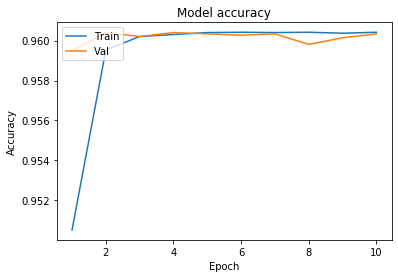

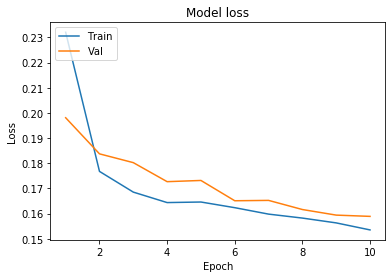

In [28]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(history, 10)

We have got an accuracy of 96%. Hence we can conclude that Convolutional neural networks with appropriate feature selection can build a very powerful model for this dataset. Feature selection enables the machine learning algorithm to train faster. It reduces the complexity of a model and makes it easier to interpret. It also improves the accuracy of a model if the right subset is chosen.